In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

## Laboratorio 09 - Carga específica (e/m) del electrón (Antiguo)
#### Laboratoria de Física Moderna 

Código hecho por: Sara Valentina Guerrero Espinosa

### Traemos los datos desde Excel

In [2]:
# Para graficar V vs I^2 para cada n: 
info_1 = [pd.read_excel('Datos_Lab09.xlsx',sheet_name='n1'),
          pd.read_excel('Datos_Lab09.xlsx',sheet_name='n2'), 
          pd.read_excel('Datos_Lab09.xlsx',sheet_name='n3')]

# Para graficar I^2 vs n para cada V:
info_2 = []
i = 300
while i < 601:
    info_2.append(pd.read_excel('Datos_Lab09.xlsx',sheet_name=str(i)))
    i += 50

In [3]:
info_1

[     V     I  n2     I^2
 0  300  1.11   1  1.2321
 1  350  1.21   1  1.4641
 2  400  1.28   1  1.6384
 3  450  1.38   1  1.9044
 4  500  1.46   1  2.1316
 5  550  1.50   1  2.2500
 6  600  1.61   1  2.5921,
      V     I  n2     I^2
 0  300  1.97   4  3.8809
 1  350  2.15   4  4.6225
 2  400  2.31   4  5.3361
 3  450  2.45   4  6.0025
 4  500  2.57   4  6.6049
 5  550  2.70   4  7.2900
 6  600  2.80   4  7.8400,
      V     I  n2      I^2
 0  300  2.74   9   7.5076
 1  350  2.98   9   8.8804
 2  400  3.23   9  10.4329]

In [4]:
info_2

[     V     I  n2     I^2
 0  300  0.00   0  0.0000
 1  300  1.11   1  1.2321
 2  300  1.97   4  3.8809
 3  300  2.74   9  7.5076,
      V     I  n2     I^2
 0  350  0.00   0  0.0000
 1  350  1.21   1  1.4641
 2  350  2.15   4  4.6225
 3  350  2.98   9  8.8804,
      V     I  n2      I^2
 0  400  0.00   0   0.0000
 1  400  1.28   1   1.6384
 2  400  2.31   4   5.3361
 3  400  3.23   9  10.4329,
      V     I  n2     I^2
 0  450  0.00   0  0.0000
 1  450  1.38   1  1.9044
 2  450  2.45   4  6.0025,
      V     I  n2     I^2
 0  500  0.00   0  0.0000
 1  500  1.46   1  2.1316
 2  500  2.57   4  6.6049,
      V    I  n2   I^2
 0  550  0.0   0  0.00
 1  550  1.5   1  2.25
 2  550  2.7   4  7.29,
      V     I  n2     I^2
 0  600  0.00   0  0.0000
 1  600  1.61   1  2.5921
 2  600  2.80   4  7.8400]

### Definimos todo el código encargado de las regresiones lineales:

In [5]:
# Regresión lineal 
def Get_LinRegr(x, y):
    x = x.reshape((-1,1)) 
    regr = LinearRegression()
    regr.fit(x,y)

    b, m = regr.intercept_, regr.coef_
    
    return m[0], b


# Bootstraping
def GetParametres(x, y, data):
     
    # Tomamos una muestra aleatoria
    muestra = random.choices(data, k=7)    
    
    # Separamos la información de la muestra
    x_m, y_m = [], []
    
    for i in range(len(muestra)):
        x_m.append(muestra[i][0])
        y_m.append(muestra[i][1])
    
    # Hallamos los parámetros
    m, b = Get_LinRegr(np.array(x_m), np.array(y_m))
    
    return m, b

def GetSample(x, y, data):
    m_ = []
    b_ = []
    
    for i in range(1000):
        m, b = GetParametres(x, y, data)
        m_.append(m)
        b_.append(b)
        
    return m_, b_


# Definimos la función de error para las incertidumbres:
def error(x, y, data):
    
    m_ , b_ = GetSample(x, y, data)
    
    # Para m:
    mu_m, sigma_m = norm.fit( m_ )
    
    # Para b:
    mu_b, sigma_b = norm.fit( b_ )
    
    return mu_m, sigma_m, mu_b, sigma_b

def GetAll(X, Y):

    # Juntamos la información agrupando cada x con su y
    data = []

    for i in range(len(X)):
        data.append([X[i],Y[i]])
        
    mu_m, sigma_m, mu_b, sigma_b = error(X, Y, data)
    
    return mu_m, sigma_m, mu_b, sigma_b


## Gráfica 01 ($V \text{ vs } I^2 $ para n = cte):

In [6]:
#V vs I^2:
def Graf01(info_1 = info_1):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    
    M_s, incM_s = [], []

    for i in range(len(info_1)):
        X, Y = np.array(info_1[i]['V']), np.array(info_1[i]['I^2'])

        mu_m, sigma_m, mu_b, sigma_b = GetAll(X, Y)

        f = np.poly1d(np.array([mu_m, mu_b]))

        ax.scatter(X, Y, s = 10 )
        ax.plot(X, f(X), label=f'(n = {i}) $I^2 ={mu_m:.5f} (V) + {mu_b:.3f}$')
        
        M_s.append(mu_m)
        incM_s.append(sigma_m)
        
        print(f'Para n = {i}, inc_m = {sigma_m} - inc_b = {sigma_b}')

    # Grafica

    plt.title('$V$ vs $I^2$', fontsize=15)
    ax.set_xlabel(r'V (V)', fontsize=12)
    ax.set_ylabel(r'$I^2 (A^2)$', fontsize=12)

    ax.legend(loc='upper right')

    fig.savefig('V_vs_I2.png', dpi=300, bbox_inches='tight')
    
    return M_s, incM_s

Para n = 0, inc_m = 0.00017952513342122374 - inc_b = 0.07219597966117995
Para n = 1, inc_m = 0.00034812255047686496 - inc_b = 0.157675241011696
Para n = 2, inc_m = 0.001959128806040637 - inc_b = 0.6889797433960778


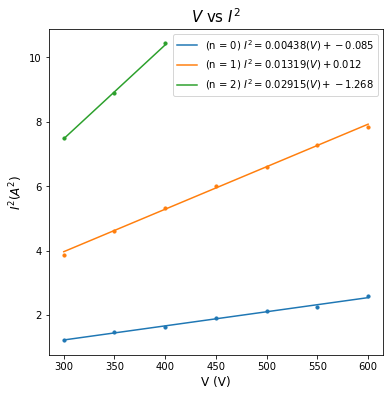

In [7]:
# V vs I^2 para n = cte:
M_sv_1, incM_s_1 = Graf01()

## Gráfica 02 ($n^2 \text{ vs } I^2 $ para v = cte):

In [32]:
# n^2 vs I^2:
def Graf02(info = info_2):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    
    j = 300
    M_s, incM_s = [], []


    for i in range(len(info)):
        X, Y = np.array(info[i]['n2']), np.array(info[i]['I^2'])

        mu_m, sigma_m, mu_b, sigma_b = GetAll(X, Y)

        f = np.poly1d(np.array([mu_m, mu_b]))

        ax.scatter(X, Y, s = 10 )
        ax.plot(X, f(X) , label=f'(V = {j}) $I^2 ={mu_m:.2f} (n^2) + {mu_b:.2f}$')
        
        M_s.append(mu_m)
        incM_s.append(sigma_m)
        
        print(f'Para V = {j}, inc_m = {round(sigma_m,3)} - inc_b = {round(sigma_b,3)}')
        
        j += 50
        

    # Grafica

    plt.title('$n^2$ vs $I^2$', fontsize=15)
    ax.set_xlabel(r'$n^2$', fontsize=12)
    ax.set_ylabel(r'$I^2 (A^2)$', fontsize=12)

    ax.legend(loc='lower right')

    fig.savefig('I_vs_n.png', dpi=300, bbox_inches='tight')
    
    return M_s, incM_s

Para V = 300, inc_m = 0.054 - inc_b = 0.158
Para V = 350, inc_m = 0.083 - inc_b = 0.202
Para V = 400, inc_m = 0.085 - inc_b = 0.208
Para V = 450, inc_m = 0.114 - inc_b = 0.138
Para V = 500, inc_m = 0.163 - inc_b = 0.176
Para V = 550, inc_m = 0.128 - inc_b = 0.154
Para V = 600, inc_m = 0.179 - inc_b = 0.206


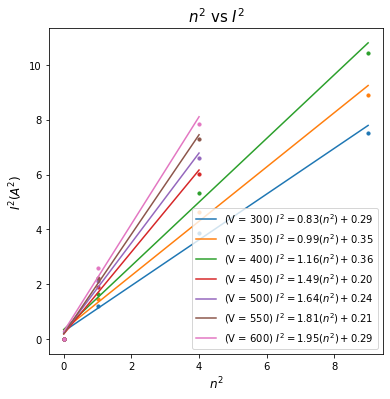

In [33]:
#n^2 vs I^2 para v = cte:
M_sv_2, incM_s_2 = Graf02()

### Calculamos e/m para cada conjunto de datos:

In [167]:
# V vs I^2 para n = cte:
def e_m_1(m, inc_m, info = info_1):
    
    e_m_s, sig_e_m_s = [], []
    
    for n in range(len(info)):
        
        cte = info[n].n2
        
        info[n] = info[n].assign(M = m[n])
        info[n] = info[n].assign(IncM = inc_m[n])
        info[n] = info[n].assign(Z = 1424293168*cte)
#         info[n] = info[n].assign(Z = 802.0631291*cte)
        
        info[n] = info[n].assign(em = info[n].Z / info[n].M)
        
        mu_e_m, sig_mu_e_m = norm.fit(info[n].em)
        
        info[n] = info[n].assign(mu_em = mu_e_m)
        
        e_m_s.append(mu_e_m)
#         sig_e_m_s.append(sig_mu_e_m)
        
    mu_em = norm.fit(e_m_s)
#     sig_em = norm.fit(sig_e_m_s)
        
    return mu_em

In [175]:
mu_em_1, sigma_mu_em_1 = e_m_1(M_sv_1, incM_s_1, info_1)
print(f'(V vs I^2 para n = cte) e/m = {mu_em_1:.9e} pm {sigma_mu_em_1:.9e}')

(V vs I^2 para n = cte) e/m = 3.988983663e+11 pm 5.228547312e+10


In [149]:
# n vs I^2 para V = cte:
def e_m_2(m, inc_m, info = info_1):
    
    e_m_s, sig_e_m_s = [], []
    
    for n in range(len(info)):
        
        cte = info[n].V
        
        info[n] = info[n].assign(M = m[n])
        info[n] = info[n].assign(IncM = inc_m[n])
        info[n] = info[n].assign(Z = 1424293168*cte)
#         info[n] = info[n].assign(Z = 802.0631291*cte)
        
        info[n] = info[n].assign(em = info[n].W / info[n].M)
        
        mu_e_m, sig_mu_e_m = norm.fit(info[n].em)
        
        info[n] = info[n].assign(mu_em = mu_e_m)
        
        e_m_s.append(mu_e_m)
#         sig_e_m_s.append(sig_mu_e_m)
        
    mu_em = norm.fit(e_m_s)
#     sig_em = norm.fit(sig_e_m_s)
        
    return mu_em

In [176]:
mu_em_2, sigma_mu_em_2 = e_m_2(M_sv_2, incM_s_2, info_2)
print(f'(I^2 vs n^2 para V = cte) e/m = {mu_em_2:.9e} pm {sigma_mu_em_2:.9e}')

(I^2 vs n^2 para V = cte) e/m = 4.634318284e+11 pm 3.479877248e+10


### Calculamos la media de los valores de e/m obtenidos en cada grafica:

In [178]:
em_final = np.mean([mu_em_1, mu_em_2])
sigma_em_final = np.mean([sigma_mu_em_1, sigma_mu_em_2])

print(f'e/m final = {em_final:.9e}')
print(f'Incertidumbre de e/m final = {sigma_em_final:.9e}')

e/m final = 4.311650974e+11
Incertidumbre de e/m final = 4.354212280e+10
